In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("../3.8 Visualization II//bank-additional-clean-nonulls.csv")
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1 hijos,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2 hijos,57.000000,3.603174,4.8
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2 hijos,37.000000,4.857000,7.0
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3 hijos,40.000000,3.595488,3.0
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3 hijos,56.000000,3.602722,7.4


# Medidas de resumen categóricas


In [4]:
# queremos analizar la distribución del estado civil de los clientes en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['marital'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['marital'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Estado Civil': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias


,Estado Civil,Frecuencia Absoluta,Frecuencia Relativa (%)
0,married,26084,60.660465
1,single,12105,28.151163
2,divorced,4811,11.188372


**Interpretación:**

- La tabla de frecuencia absoluta muestra cuántos clientes están en cada categoría de estado civil.

- La tabla de frecuencia relativa muestra el porcentaje de clientes en cada categoría con respecto al total de clientes.

- Por lo tanto, vemos que la categoría que domina es la de "casado" dentro de nuestro conjunto de datos, con un 60% de los datos. 

Para seguir recordando un poco la visualización que aprendimos ayer, usando la tabla generada previamente podemos hacer un `barplot`. 

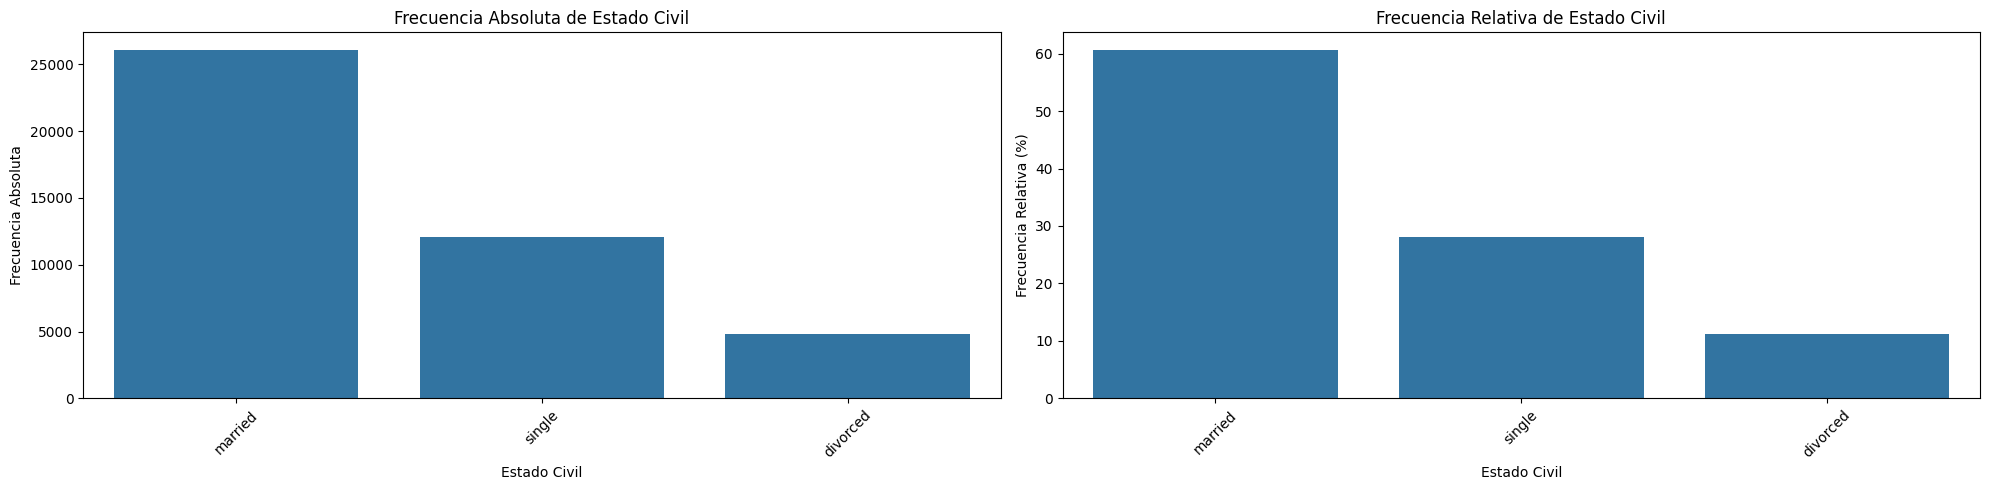

In [5]:
# Crear un subplot con 2 filas y 1 columna
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico de barras para la frecuencia absoluta
sns.barplot(x='Estado Civil', y='Frecuencia Absoluta', data=tabla_frecuencias, ax=axes[0])
axes[0].set_title('Frecuencia Absoluta de Estado Civil')
axes[0].set_xlabel('Estado Civil')
axes[0].set_ylabel('Frecuencia Absoluta')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para la frecuencia relativa
sns.barplot(x='Estado Civil', y='Frecuencia Relativa (%)', data=tabla_frecuencias, ax=axes[1])
axes[1].set_title('Frecuencia Relativa de Estado Civil')
axes[1].set_xlabel('Estado Civil')
axes[1].set_ylabel('Frecuencia Relativa (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout();


## Tabla de contingencia

Para calcular estas tablas de contingencia usaremos el método `pd.crosstab()` de Pandas. La sintaxis del método es:

```python
pd.crosstab(index, columns, rownames, colnames,  dropna, normalize)
```

In [6]:
# queremos analizar cómo se distribuye el nivel de educación de los clientes en función de su estado civil.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['education'], df['marital'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos clientes pertenecen a cada combinación de nivel de educación y estado civil (nos mostrará el % si incluimos el parámetro "normalize", como hemos hecho en este ejemplo).
tabla_contingencia



marital,divorced,married,single
education,,,
Unknown,0.444186,2.597674,1.160465
basic 4y,1.200000,7.841860,1.088372
basic 6y,0.441860,4.302326,0.804651
basic 9y,1.376744,10.093023,3.202326
high school,2.883721,12.527907,7.669767
illiterate,0.004651,0.034884,0.002326
professional course,1.602326,7.679070,3.455814
university degree,3.234884,15.583721,10.767442


Podemos observar que las personas con un "university degree" (grado universitario) tienden a estar casadas ("married") en comparación con las personas con niveles educativos más bajos. 